## Observations and Insights 

In [5]:
#write at least three observations or inferences that can be made from the data. 
#Include these observations at the top of notebook.

"""Capomulin and Ramicane were the medicines that were most experimented on the mice.
Ceftamine was the most effective Drug in reducing mice Tumor.
Mice gender used in experiment was almost same."""


'Capomulin and Ramicane were the medicines that were most experimented on the mice.\nCeftamine was the most effective Drug in reducing mice Tumor.\nMice gender used in experiment was almost same.'

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata.head(),study_results.head()
combine_df=pd.merge(study_results,mouse_metadata,on="Mouse ID")
# Display the data table for preview
combine_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Checking the number of mice.
combine_df["Mouse ID"].count()

1893

In [8]:
combine_df=combine_df.dropna(how='any')
combine_df["Mouse ID"].count()

1893

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

print("Duplicate Cases \n",)

#(columns=["Mouse ID", "name", "Timepoint"]
new_df=combine_df.drop_duplicates(subset=["Mouse ID","Timepoint"], keep=False)
print(new_df.count())

Duplicate Cases 

Mouse ID              1883
Timepoint             1883
Tumor Volume (mm3)    1883
Metastatic Sites      1883
Drug Regimen          1883
Sex                   1883
Age_months            1883
Weight (g)            1883
dtype: int64


In [10]:
# Optional: Get all the data for the duplicate mouse ID. 

combine_df[combine_df.duplicated(["Mouse ID","Timepoint"])].head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [12]:
# Checking the number of mice in the clean DataFrame.

print(new_df["Mouse ID"].count())

1883


## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_df=new_df.groupby("Drug Regimen")
print(drug_df["Tumor Volume (mm3)"])
mean=drug_df["Tumor Volume (mm3)"].mean()
median=drug_df["Tumor Volume (mm3)"].median()
variance = drug_df['Tumor Volume (mm3)'].var()
std =drug_df['Tumor Volume (mm3)'].std()
sem =drug_df['Tumor Volume (mm3)'].sem()
# This method is the most straighforward, creating multiple series and putting them all together at the end.


summary_stats = pd.DataFrame({"Mean": mean, "Median":median, "Variance":variance, "Standard Deviation": std, "SEM": sem})
summary_stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:

drug_df.describe()

Timepoint                                                     \
                 count       mean        std  min   25%   50%   75%   max   
Drug Regimen                                                                
Capomulin        230.0  21.565217  14.384994  0.0  10.0  20.0  35.0  45.0   
Ceftamin         178.0  19.747191  14.283969  0.0   5.0  20.0  30.0  45.0   
Infubinol        178.0  18.174157  13.473473  0.0   5.0  15.0  30.0  45.0   
Ketapril         188.0  19.707447  14.029935  0.0   5.0  20.0  30.0  45.0   
Naftisol         186.0  19.623656  14.184814  0.0   5.0  20.0  30.0  45.0   
Placebo          181.0  18.674033  13.890798  0.0   5.0  15.0  30.0  45.0   
Propriva         151.0  17.317881  13.672050  0.0   5.0  15.0  30.0  45.0   
Ramicane         228.0  21.425439  14.275720  0.0  10.0  20.0  35.0  45.0   
Stelasyn         181.0  19.226519  13.842710  0.0   5.0  20.0  30.0  45.0   
Zoniferol        182.0  19.368132  14.384679  0.0   5.0  15.0  30.0  45.0   

             Tumor Volume (mm3)             ... Age_months       Weight (g)  \
                          count       mean  ...        75%   max      count   
Drug Regimen                                ...                               
Capomulin                 230.0  40.675741  ...       20.0  24.0      230.0   
Ceftamin                  178.0  52.591172  ...       20.0  24.0      178.0   
Infubinol                 178.0  52.884795  ...       23.0  24.0      178.0   
Ketapril                  188.0  55.235638  ...       19.0  24.0      188.0   
Naftisol                  186.0  54.331565  ...       19.0  23.0      186.0   
Placebo                   181.0  54.033581  ...       17.0  21.0      181.0   
Propriva                  151.0  52.458254  ...       16.0  24.0      151.0   
Ramicane                  228.0  40.216745  ...       18.0  23.0      228.0   
Stelasyn                  181.0  54.233149  ...       21.0  23.0      181.0   
Zoniferol                 182.0  53.236507  ...       16.0  24.0      182.0   

                                                                 
                   mean       std   min   25%   50%   75%   max  
Drug Regimen                                                     
Capomulin     19.965217  2.732404  15.0  17.0  20.5  22.0  25.0  
Ceftamin      27.398876  1.581460  25.0  26.0  28.0  28.0  30.0  
Infubinol     27.196629  2.183810  23.0  25.0  27.0  29.0  30.0  
Ketapril      27.861702  1.841884  25.0  26.0  28.0  30.0  30.0  
Naftisol      27.166667  1.499249  25.0  26.0  27.0  28.0  30.0  
Placebo       27.928177  1.837973  25.0  27.0  28.0  30.0  30.0  
Propriva      27.112583  1.703107  25.0  26.0  26.0  29.0  30.0  
Ramicane      19.679825  3.235014  16.0  17.0  19.0  22.0  25.0  
Stelasyn      27.856354  1.643616  25.0  27.0  28.0  29.0  30.0  
Zoniferol     27.692308  1.419612  25.0  27.0  28.0  29.0  30.0  

[10 rows x 40 columns]

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

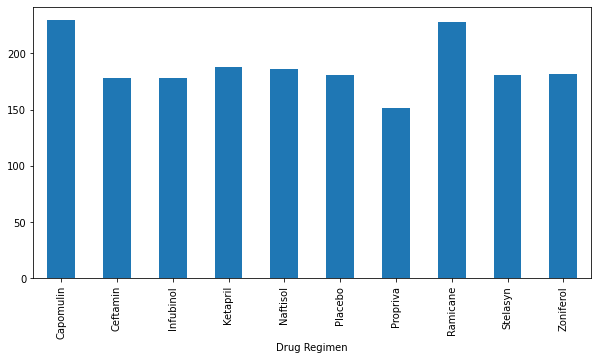

In [31]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
count_medTreatment=drug_df.count()["Mouse ID"]
#print(count_medTreatment)
count_medTreatment.plot(kind="bar", figsize=(10,5))


([<matplotlib.axis.XTick at 0x2ab7e01c988>,
 [Text(0.0, 0, 'Capomulin'),
  Text(1.0, 0, 'Ceftamin'),
  Text(2.0, 0, 'Infubinol'),
  Text(3.0, 0, 'Ketapril'),
  Text(4.0, 0, 'Naftisol'),
  Text(5.0, 0, 'Placebo'),
  Text(6.0, 0, 'Propriva'),
  Text(7.0, 0, 'Ramicane'),
  Text(8.0, 0, 'Stelasyn'),
  Text(9.0, 0, 'Zoniferol')])

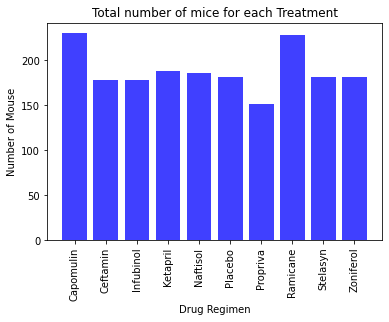

In [30]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
split=drug_df["Mouse ID"].count().reset_index()
#print(split)
xaxis=split["Drug Regimen"]
plt.ylabel("Number of Mouse")
plt.xlabel("Drug Regimen")
plt.title("Total number of mice for each Treatment")
y=split["Mouse ID"]
plt.bar(xaxis,y, color='b', alpha=0.75, align='center')
tick_locations = [value for value in xaxis]
plt.xticks(tick_locations, xaxis, rotation='vertical')

<AxesSubplot:ylabel='Mouse ID'>

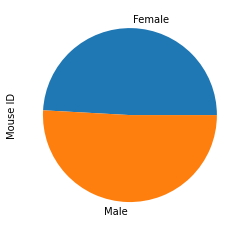

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_gender_df=new_df.groupby("Sex")["Mouse ID"].count()
mouse_gender_df.plot(kind="pie")

Male


Sex
Female    925
Male      958
Name: Mouse ID, dtype: int64

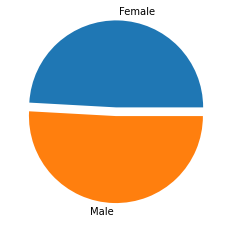

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=mouse_gender_df.index[:2]
print(labels[1])
num=mouse_gender_df

plt.pie(num, labels=labels,explode=[0.1,0])

#plt.show()
num

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
tp=combine_df.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max()
# Start by getting the last (greatest) timepoint for each mouse
dfTP=pd.DataFrame({"Timepoint":tp}).reset_index()
dfTP1 = dfTP.loc[dfTP["Drug Regimen"].isin(['Capomulin',"Ramicane","Infubinol","Ceftamin"]),:]
print(dfTP1)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_tumor_drug_df=pd.merge(dfTP1,combine_df, on=["Mouse ID","Timepoint","Drug Regimen"])
mouse_tumor_drug_df.head()

    Drug Regimen Mouse ID  Timepoint
0      Capomulin     b128         45
1      Capomulin     b742         45
2      Capomulin     f966         20
3      Capomulin     g288         45
4      Capomulin     g316         45
..           ...      ...        ...
195     Ramicane     s508         45
196     Ramicane     u196         45
197     Ramicane     w678          5
198     Ramicane     y449         15
199     Ramicane     z578         45

[100 rows x 3 columns]


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,45,38.982878,2,Female,9,22
1,Capomulin,b742,45,38.939633,0,Male,7,21
2,Capomulin,f966,20,30.485985,0,Male,16,17
3,Capomulin,g288,45,37.074024,1,Male,3,19
4,Capomulin,g316,45,40.159220,2,Female,22,22


['Capomulin' 'Ceftamin' 'Infubinol' 'Ramicane']
The lower quartile of Capomulin tumors: 32.3774
The upper quartile of Capomulin tumors: 40.1592
The interquartile range of Capomulin tumors: 7.7818
The median of Capomulin tumors: 38.1252 
Values below 20.7047 could be outliers.
Values above 51.8319 could be outliers.
The lower quartile of Ceftamin tumors: 48.7221
The upper quartile of Ceftamin tumors: 64.2998
The interquartile range of Ceftamin tumors: 15.5777
The median of Ceftamin tumors: 59.852 
Values below 25.3555 could be outliers.
Values above 87.6664 could be outliers.
The lower quartile of Infubinol tumors: 54.0486
The upper quartile of Infubinol tumors: 65.5257
The interquartile range of Infubinol tumors: 11.4771
The median of Infubinol tumors: 60.1652 
Values below 36.8329 could be outliers.
Values above 82.7414 could be outliers.
The lower quartile of Ramicane tumors: 31.5605
The upper quartile of Ramicane tumors: 40.659
The interquartile range of Ramicane tumors: 9.0985
The 

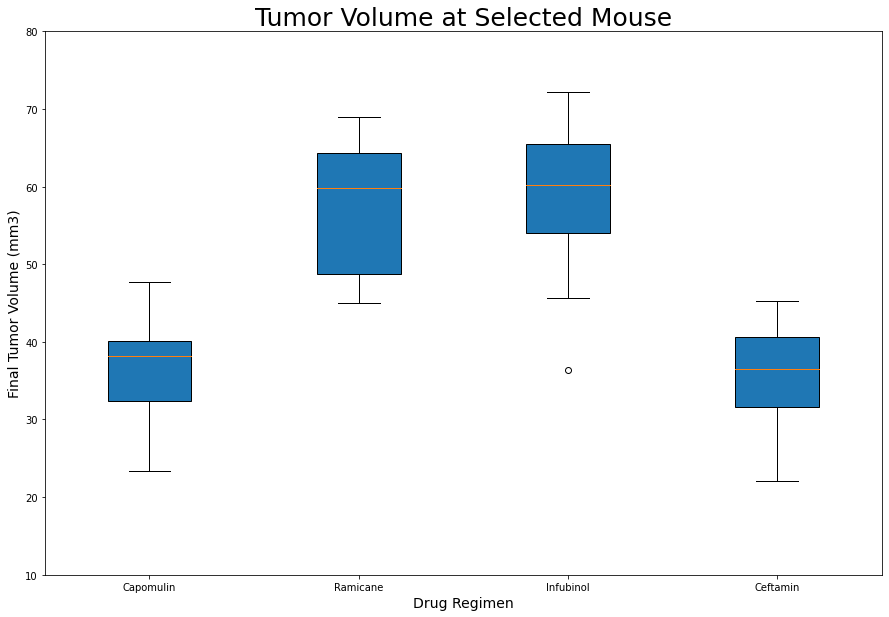

In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=mouse_tumor_drug_df["Drug Regimen"].unique()
print(treatments)
# Create empty list to fill with tumor vol data (for plotting)
tumorVol=[]
for t in treatments:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    dft=mouse_tumor_drug_df.loc[mouse_tumor_drug_df["Drug Regimen"]==t,:]
   
    quartiles =round(dft["Tumor Volume (mm3)"].quantile([.25,.5,.75]),4)
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = round(upperq-lowerq,4)


    print(f"The lower quartile of {t} tumors: {lowerq}")
    print(f"The upper quartile of {t} tumors: {upperq}")
    print(f"The interquartile range of {t} tumors: {iqr}")
    print(f"The median of {t} tumors: {quartiles[0.5]} ")

    lower_bound = round(lowerq - (1.5*iqr),4)
    upper_bound = round(upperq + (1.5*iqr),4)

    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    tumorVol.append(dft["Tumor Volume (mm3)"])
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(tumorVol, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)

plt.savefig("../Images/box_plot.png", bbox_inches = "tight")

plt.show()
    
    # Determine outliers using upper and lower bounds
    

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

Text(0.5, 1.0, 'Time Point vs Tumor Volume for MouseID=g288')

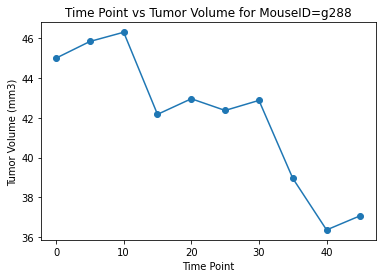

In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

mouse_data_df=combine_df.loc[combine_df["Mouse ID"]=="g288"]
mouse_data_df

plt.plot(mouse_data_df["Timepoint"],mouse_data_df["Tumor Volume (mm3)"],marker="o")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Time Point vs Tumor Volume for MouseID=g288")

Mouse ID
b128    22
b742    21
f966    17
g288    19
g316    22
i557    24
i738    20
j119    23
j246    21
l509    21
l897    19
m601    17
m957    19
r157    25
r554    17
r944    25
s185    17
s710    23
t565    17
u364    17
v923    21
w150    23
w914    21
x401    15
y793    17
Name: Weight (g), dtype: int64


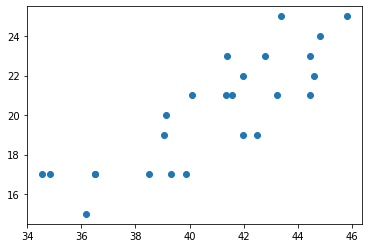

In [23]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
dfw = combine_df.loc[combine_df["Drug Regimen"]=='Capomulin',:]

weight_df=dfw.groupby(["Mouse ID"])["Weight (g)"].mean()
tum_df=dfw.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()

print(weight_df)
plt.scatter(tum_df,weight_df)

## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(weight_df,tum_df)[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [25]:
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight_df, tum_df)
regress_values = weight_df * slope + intercept

The r-squared is: 0.7088568047708717


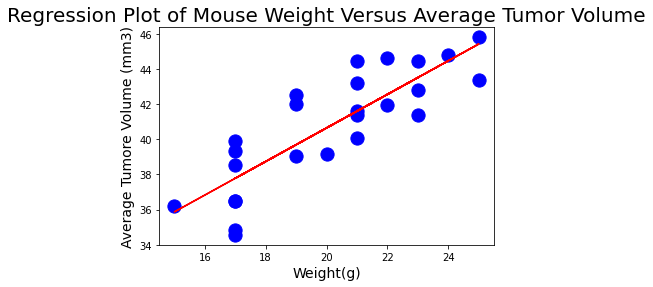

In [26]:
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight_df,tum_df,s=175, color="blue")
plt.plot(weight_df,regress_values,"r-")
plt.title('Regression Plot of Mouse Weight Versus Average Tumor Volume',fontsize =20)
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =14)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.savefig("../Images/linear_regression.png", bbox_inches = "tight")
plt.show()